## Hotel Booking Demand

https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

Content
This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

All personally identifying information has been removed from the data.

Acknowledgements
The data is originally from the article Hotel Booking Demand Datasets, written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019.

The data was downloaded and cleaned by Thomas Mock and Antoine Bichat for #TidyTuesday during the week of February 11th, 2020.

Inspiration
This data set is ideal for anyone looking to practice their exploratory data analysis (EDA) or get started in building predictive models!

If you're looking for inspiration on data visualizations, check out the #TidyTuesday program, a free, weekly online event that encourages participants to create and share their code and visualizations for a given data set on Twitter.

If you'd like to dive into predictive modeling, Julia Silge has an accessible and fantastic walk-through which highlights the tidymodels R package.

### Liberaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('/content/hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
df.shape

(119390, 32)

In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [7]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [8]:
df['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [9]:
df['meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [10]:
df['customer_type'].value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

In [11]:
df['deposit_type'].value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

In [12]:
df['distribution_channel'].value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

<Axes: xlabel='hotel', ylabel='count'>

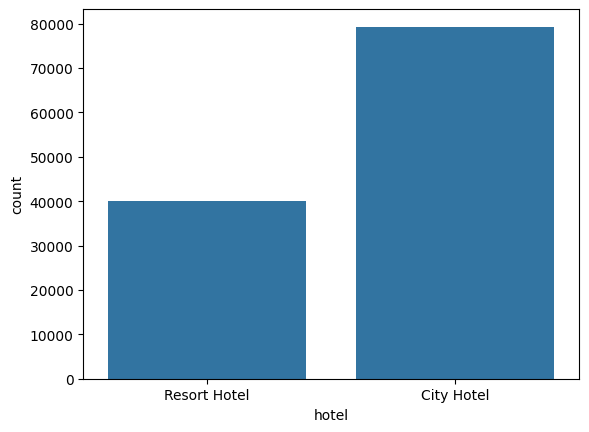

In [13]:
sns.countplot(data=df, x='hotel')

<Axes: xlabel='is_canceled', ylabel='count'>

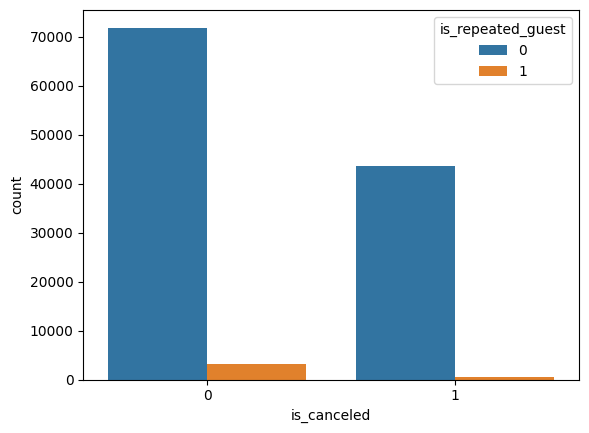

In [14]:
sns.countplot(data=df, x='is_canceled', hue='is_repeated_guest')

###Data Preparation

In [15]:
df.isnull().values.any()  # missing data

True

In [16]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [17]:
#Replacing missing values with 0
df.fillna(0, inplace=True)

In [18]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [19]:
#Meal contains value " Undefined", which is equal to SC
df['meal'].replace("Undefined",'SC', inplace=True )

In [20]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

In [21]:
Subset=df[(df["children"]==0)&(df['babies']==0) & (df['adults']==0)]
Subset[['babies','children','adults']]

,babies,children,adults
2224,0,0.0,0
2409,0,0.0,0
3181,0,0.0,0
3684,0,0.0,0
3708,0,0.0,0
...,...,...,...
115029,0,0.0,0
115091,0,0.0,0
116251,0,0.0,0
116534,0,0.0,0


In [22]:
Delete=(df["children"]==0)&(df['babies']==0) & (df['adults']==0)
Delete

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119390, dtype: bool

In [23]:
data=df[~Delete]
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [24]:
data.shape

(119210, 32)

In [25]:
Subset=data[(data["children"]==0)&(data['babies']==0) & (data['adults']==0)]
Subset

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [26]:
data.shape

(119210, 32)

In [27]:
data.to_csv('Updataed_Hotel_Booking.csv', index=False)

##  Guests come from

In [28]:
guests_country=data[data['is_canceled']==0]['country'].value_counts().reset_index()
guests_country

,index,country
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,BHR,1
162,DJI,1
163,MLI,1
164,NPL,1


In [29]:
guests_country.columns=['country','Number of guests']
guests_country

,country,Number of guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,BHR,1
162,DJI,1
163,MLI,1
164,NPL,1


In [30]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# Assuming guests_country is your DataFrame containing the data

trace = go.Bar(
    x=guests_country['country'],
    y=guests_country['Number of guests'],
    marker=dict(color='#CD7F32')
)
data = [trace]
layout = go.Layout(title='Guests by Country')

fig = go.Figure(data=data, layout=layout)

# Display the plot in Google Colab
fig.show()

In [31]:
import plotly.express as px

fig = px.choropleth(guests_country,
                         locations=guests_country['country'],
                         color=guests_country['Number of guests'],
                         hover_name=guests_country['country'],
                         title='Home country of guests')

fig.show()

In [32]:
total_guests=guests_country['Number of guests'].sum()
guests_country['Guests %']=round(guests_country['Number of guests']/total_guests*100,2)
guests_country

,country,Number of guests,Guests %
0,PRT,20977,27.97
1,GBR,9668,12.89
2,FRA,8468,11.29
3,ESP,6383,8.51
4,DEU,6067,8.09
...,...,...,...
161,BHR,1,0.00
162,DJI,1,0.00
163,MLI,1,0.00
164,NPL,1,0.00


In [33]:
#Room price
resort=df[(df['hotel']=='Resort Hotel') & (df['is_canceled']==0)]
city=df[(df['hotel']=='City Hotel') & (df['is_canceled']==0)]


In [34]:
df[df['hotel']=='City Hotel']

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,City Hotel,0,6,2015,July,27,1,0,2,1,...,No Deposit,6.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-03
40061,City Hotel,1,88,2015,July,27,1,0,4,2,...,No Deposit,9.0,0.0,0,Transient,76.50,0,1,Canceled,2015-07-01
40062,City Hotel,1,65,2015,July,27,1,0,4,1,...,No Deposit,9.0,0.0,0,Transient,68.00,0,1,Canceled,2015-04-30
40063,City Hotel,1,92,2015,July,27,1,2,4,2,...,No Deposit,9.0,0.0,0,Transient,76.50,0,2,Canceled,2015-06-23
40064,City Hotel,1,100,2015,July,27,2,0,2,2,...,No Deposit,9.0,0.0,0,Transient,76.50,0,1,Canceled,2015-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [35]:
resort_hotel=resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.322236
3,February,54.147478
4,January,48.708919
5,July,150.122528
6,June,107.921869
7,March,57.012487
8,May,76.657558
9,November,48.681640


In [36]:
city_hotel=city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,111.856824
1,August,118.412083
2,December,87.856764
3,February,86.183025
4,January,82.160634
5,July,115.563810
6,June,117.702075
7,March,90.170722
8,May,120.445842
9,November,86.500456


In [37]:
final=resort_hotel.merge(city_hotel, on="arrival_date_month")
final

,arrival_date_month,adr_x,adr_y
0,April,75.867816,111.856824
1,August,181.205892,118.412083
2,December,68.322236,87.856764
3,February,54.147478,86.183025
4,January,48.708919,82.160634
5,July,150.122528,115.563810
6,June,107.921869,117.702075
7,March,57.012487,90.170722
8,May,76.657558,120.445842
9,November,48.681640,86.500456


In [38]:
final.columns=['month','price_for_resort', 'price_for_city_hotel']
final

,month,price_for_resort,price_for_city_hotel
0,April,75.867816,111.856824
1,August,181.205892,118.412083
2,December,68.322236,87.856764
3,February,54.147478,86.183025
4,January,48.708919,82.160634
5,July,150.122528,115.563810
6,June,107.921869,117.702075
7,March,57.012487,90.170722
8,May,76.657558,120.445842
9,November,48.681640,86.500456


In [39]:
!pip install sort-dataframeby-monthorweek

  Preparing metadata (setup.py) ... done
  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3420 sha256=3642bb6ccd8804267387e1e129a419c33b55a0c40f13fc3a36fcdd0d6785b133
  Stored in directory: /root/.cache/pip/wheels/6b/fd/39/06eaac8d65d641f9f50856a48b57a5ec8351be2874beff01ec
Successfully built sort-dataframeby-monthorweek


In [40]:
!pip install sorted-months-weekdays

  Preparing metadata (setup.py) ... done
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3224 sha256=1b092f235780d3b187803b7f08c392310653aeaf3986b668d43b57dd62333bdc
  Stored in directory: /root/.cache/pip/wheels/bd/b4/f6/2c29a96668a9a13a568134857fd7b7a5186261f00f1d35661c
Successfully built sorted-months-weekdays


In [41]:
import sort_dataframeby_monthorweek as sd
final=sd.Sort_Dataframeby_Month(df=final, monthcolumnname='month')
final


,month,price_for_resort,price_for_city_hotel
0,January,48.708919,82.160634
1,February,54.147478,86.183025
2,March,57.012487,90.170722
3,April,75.867816,111.856824
4,May,76.657558,120.445842
5,June,107.921869,117.702075
6,July,150.122528,115.563810
7,August,181.205892,118.412083
8,September,96.416860,112.598452
9,October,61.727505,101.745956


In [42]:
fig=px.line(final,
        x='month',
        y=['price_for_city_hotel', 'price_for_resort'], title='Room price per night over the Month')
fig.show()

In [43]:
print(df['reserved_room_type'].unique())

['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']


In [44]:
df['adr_Updated']=df['adr']/(df['adults']+df['children'])
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_Updated
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0.000000
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0.000000
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,75.000000
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,75.000000
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,49.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,48.070000
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,75.143333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,78.855000
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,52.200000


In [45]:
valid_guest=df.loc[df['is_canceled']==0]
valid_guest

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_Updated
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0.000000
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0.000000
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,75.000000
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,75.000000
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,49.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,48.070000
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,75.143333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,78.855000
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,52.200000


In [46]:
prices=valid_guest[['hotel','reserved_room_type', 'adr_Updated']].sort_values('reserved_room_type')
prices

,hotel,reserved_room_type,adr_Updated
80541,City Hotel,A,68.850
90111,City Hotel,A,55.675
90112,City Hotel,A,49.830
90114,City Hotel,A,64.000
90115,City Hotel,A,64.500
...,...,...,...
26937,Resort Hotel,H,80.500
14570,Resort Hotel,L,82.000
15855,Resort Hotel,L,86.000
911,Resort Hotel,L,100.000


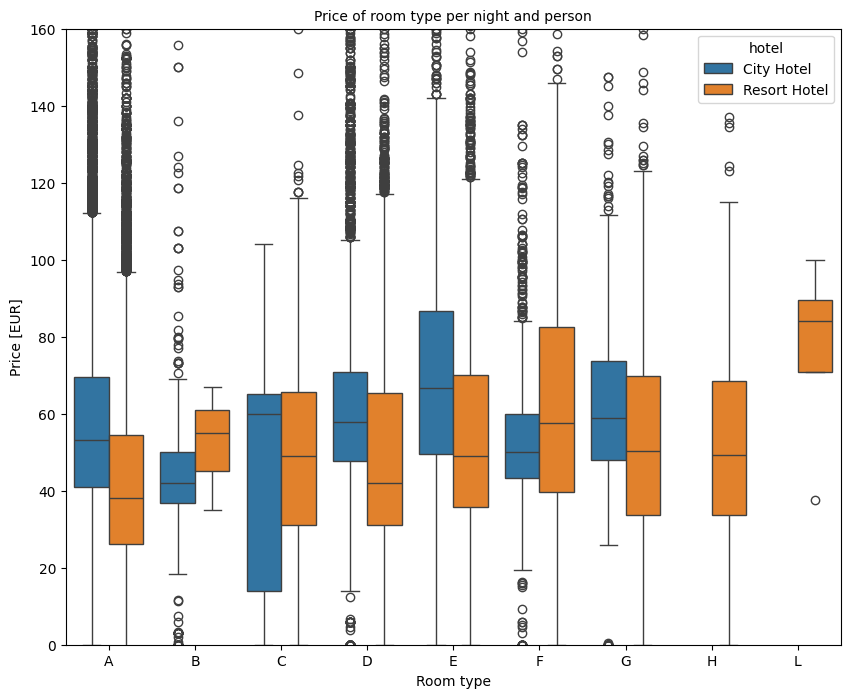

In [47]:
plt.figure(figsize=(10,8))
sns.boxplot(x='reserved_room_type',
            y='adr_Updated',
            hue='hotel',
            data=prices
            )
plt.title("Price of room type per night and person", fontsize=10)
plt.xlabel('Room type', fontsize=10)
plt.ylabel('Price [EUR]', fontsize=10)
plt.ylim(0,160)
plt.show()


In [48]:
prices_C=prices[prices['reserved_room_type']=='C']
prices_City=prices_C[prices_C['hotel']=='City Hotel']
prices_City

,hotel,reserved_room_type,adr_Updated
99432,City Hotel,C,65.0
99431,City Hotel,C,65.0
111027,City Hotel,C,NaN
80557,City Hotel,C,18.5
44693,City Hotel,C,65.0
119278,City Hotel,C,104.0
101137,City Hotel,C,55.0
82508,City Hotel,C,0.0
82509,City Hotel,C,0.0


In [49]:
prices_Resort=prices_C[prices_C['hotel']=='Resort Hotel']
prices_Resort

,hotel,reserved_room_type,adr_Updated
25853,Resort Hotel,C,82.500000
26926,Resort Hotel,C,60.250000
26108,Resort Hotel,C,49.125000
26861,Resort Hotel,C,162.000000
26535,Resort Hotel,C,43.262500
...,...,...,...
27439,Resort Hotel,C,52.790000
29232,Resort Hotel,C,29.666667
31571,Resort Hotel,C,91.750000
27407,Resort Hotel,C,85.215000


In [50]:
prices_Resort.describe()

,adr_Updated
count,615.000000
mean,50.549085
std,27.821397
min,0.000000
25%,31.000000
50%,49.000000
75%,65.562500
max,171.000000


In [53]:
df_people_stay=df[df['is_canceled']==0]
df_people_stay['total_nights']=df_people_stay['stays_in_weekend_night']=df_people_stay['stays_in_week_nights']
df_people_stay

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_Updated,total_nights,stays_in_weekend_night
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.00,0,0,Check-Out,2015-07-01,0.000000,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.00,0,0,Check-Out,2015-07-01,0.000000,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,75.000000,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,75.000000,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.00,0,1,Check-Out,2015-07-03,49.000000,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,Transient,96.14,0,0,Check-Out,2017-09-06,48.070000,5,5
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,Transient,225.43,0,2,Check-Out,2017-09-07,75.143333,5,5
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,Transient,157.71,0,4,Check-Out,2017-09-07,78.855000,5,5
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,Transient,104.40,0,0,Check-Out,2017-09-07,52.200000,5,5


In [54]:
df4=df_people_stay[['total_nights','hotel','is_canceled']]
df4

,total_nights,hotel,is_canceled
0,0,Resort Hotel,0
1,0,Resort Hotel,0
2,1,Resort Hotel,0
3,1,Resort Hotel,0
4,2,Resort Hotel,0
...,...,...,...
119385,5,City Hotel,0
119386,5,City Hotel,0
119387,5,City Hotel,0
119388,5,City Hotel,0


In [55]:
hotel_stay=df4.groupby(['total_nights','hotel']).agg('count').reset_index()
hotel_stay

,total_nights,hotel,is_canceled
0,0,City Hotel,3483
1,0,Resort Hotel,2249
2,1,City Hotel,13154
3,1,Resort Hotel,7325
4,2,City Hotel,13777
5,2,Resort Hotel,5033
6,3,City Hotel,9674
7,3,Resort Hotel,4079
8,4,City Hotel,3671
9,4,Resort Hotel,2397


In [56]:
hotel_stay=hotel_stay.rename(columns={'is_canceled':'Number of stays'})
hotel_stay

,total_nights,hotel,Number of stays
0,0,City Hotel,3483
1,0,Resort Hotel,2249
2,1,City Hotel,13154
3,1,Resort Hotel,7325
4,2,City Hotel,13777
5,2,Resort Hotel,5033
6,3,City Hotel,9674
7,3,Resort Hotel,4079
8,4,City Hotel,3671
9,4,Resort Hotel,2397


In [57]:
hotel_stay_C=hotel_stay[hotel_stay['hotel']=='City Hotel']
hotel_stay_C


,total_nights,hotel,Number of stays
0,0,City Hotel,3483
2,1,City Hotel,13154
4,2,City Hotel,13777
6,3,City Hotel,9674
8,4,City Hotel,3671
10,5,City Hotel,1985
12,6,City Hotel,194
14,7,City Hotel,99
16,8,City Hotel,80
18,9,City Hotel,28


In [58]:
hotel_stay_R=hotel_stay[hotel_stay['hotel']=='Resort Hotel']
hotel_stay_R


,total_nights,hotel,Number of stays
1,0,Resort Hotel,2249
3,1,Resort Hotel,7325
5,2,Resort Hotel,5033
7,3,Resort Hotel,4079
9,4,Resort Hotel,2397
11,5,Resort Hotel,5231
13,6,Resort Hotel,723
15,7,Resort Hotel,607
17,8,Resort Hotel,356
19,9,Resort Hotel,108


In [59]:
trace=go.Bar(
    x=hotel_stay_R ['total_nights'],
    y=hotel_stay_R ['Number of stays'],
                    name='Resort Stay'
)
trace_1=go.Bar(
    x=hotel_stay_C ['total_nights'],
    y=hotel_stay_C ['Number of stays'],
                    name='City Stay'
)

dataS=[trace,trace_1]
layout=go.Layout( title="Total number of steys by Guest")
fig = go.Figure(data=dataS, layout=layout)

# Display the plot in Google Colab
fig.show()


In [60]:
marked_segments =df['market_segment'].value_counts()
marked_segments

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [61]:
fig=px.pie(marked_segments,
           values=marked_segments.values,
           names=marked_segments.index,
           title=' Booking per market segment',
           template='seaborn')
fig.update_traces(rotation=-90, textinfo='percent+label')
fig.show()

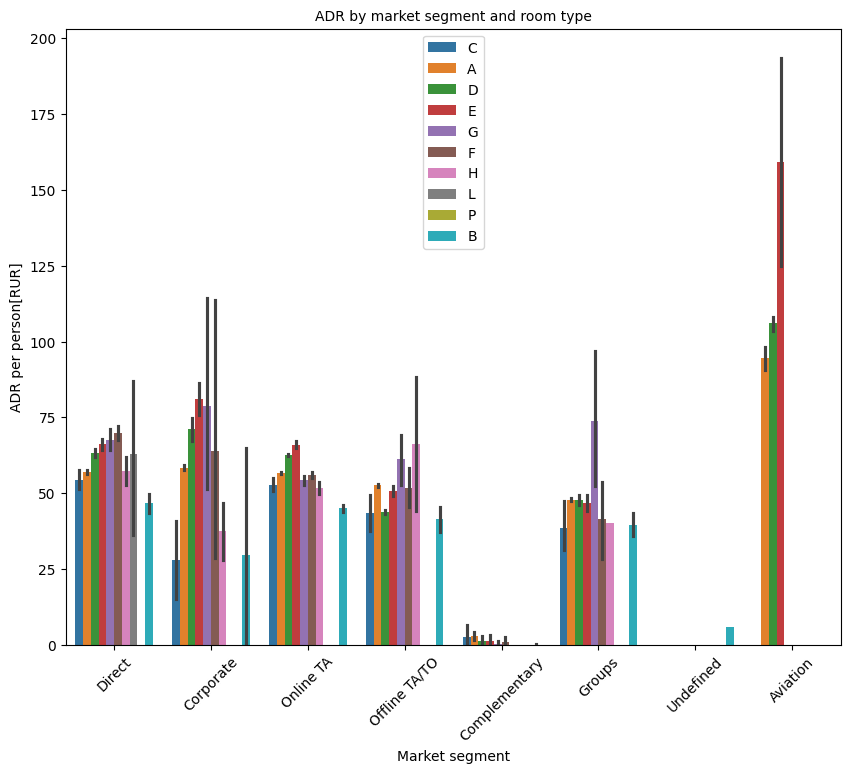

In [62]:
plt.figure(figsize=(10,8))
sns.barplot(x='market_segment',
            y='adr_Updated',
            hue='reserved_room_type',
            data=df,
            )
plt.title('ADR by market segment and room type', fontsize=10)
plt.xlabel('Market segment', fontsize=10)
plt.ylabel('ADR per person[RUR]', fontsize=10)
plt.xticks(rotation=45)
plt.legend(loc='upper center')
plt.show()

In [63]:
Cencel=df['is_canceled'].sum()
Cencel

44224

In [64]:
resort_cancelation=df.loc[df['hotel']=='Resort Hotel']['is_canceled'].sum()
resort_cancelation

11122

In [65]:
city_cancelation=df.loc[df['hotel']=='City Hotel']['is_canceled'].sum()
city_cancelation

33102

In [66]:
Cancel=df['is_canceled']==1
cancel=Cancel.sum()
print(f"Total Booking Cancelled:{cancel}")
print(f"Total Resort Cancelled:{resort_cancelation}")
print(f"Total City Cancelled:{city_cancelation}")

Total Booking Cancelled:44224
Total Resort Cancelled:11122
Total City Cancelled:33102


In [67]:
# the highest number of cancelations

resort_hotel_book_per_month=df.loc[(df['hotel']=='Resort Hotel')].groupby('arrival_date_month')['hotel'].count()
resort_hotel_cancel_per_month=df.loc[(df['hotel']=='Resort Hotel')].groupby('arrival_date_month')['is_canceled'].sum()

city_hotel_book_per_month=df.loc[(df['hotel']=='City Hotel')].groupby('arrival_date_month')['hotel'].count()
city_hotel_cancel_per_month=df.loc[(df['hotel']=='City Hotel')].groupby('arrival_date_month')['is_canceled'].sum()

In [70]:
resort_hotel_cancel_data=pd.DataFrame( {'Hotel':'Resort Hotel',
                                        'Month':list(resort_hotel_book_per_month.index),
                                        'Bookings':list(resort_hotel_book_per_month.values),
                                        'Cancelations':list(resort_hotel_cancel_per_month.values)
                                                                                })
resort_hotel_cancel_data


,Hotel,Month,Bookings,Cancelations
0,Resort Hotel,April,3609,1059
1,Resort Hotel,August,4894,1637
2,Resort Hotel,December,2648,631
3,Resort Hotel,February,3103,795
4,Resort Hotel,January,2193,325
5,Resort Hotel,July,4573,1436
6,Resort Hotel,June,3045,1007
7,Resort Hotel,March,3336,763
8,Resort Hotel,May,3559,1024
9,Resort Hotel,November,2437,461


In [71]:
city_hotel_cancel_data=pd.DataFrame( {'Hotel':'City Hotel',
                                        'Month':list(city_hotel_book_per_month.index),
                                        'Bookings':list(city_hotel_book_per_month.values),
                                        'Cancelations':list(city_hotel_cancel_per_month.values)
                                                                                })
city_hotel_cancel_data


,Hotel,Month,Bookings,Cancelations
0,City Hotel,April,7480,3465
1,City Hotel,August,8983,3602
2,City Hotel,December,4132,1740
3,City Hotel,February,4965,1901
4,City Hotel,January,3736,1482
5,City Hotel,July,8088,3306
6,City Hotel,June,7894,3528
7,City Hotel,March,6458,2386
8,City Hotel,May,8232,3653
9,City Hotel,November,4357,1661


In [73]:
full_cancel_data=pd.concat([city_hotel_cancel_data,resort_hotel_cancel_data], ignore_index=True)
full_cancel_data

,Hotel,Month,Bookings,Cancelations
0,City Hotel,April,7480,3465
1,City Hotel,August,8983,3602
2,City Hotel,December,4132,1740
3,City Hotel,February,4965,1901
4,City Hotel,January,3736,1482
5,City Hotel,July,8088,3306
6,City Hotel,June,7894,3528
7,City Hotel,March,6458,2386
8,City Hotel,May,8232,3653
9,City Hotel,November,4357,1661


In [74]:
resort_hotel_cancel_data_1=sd.Sort_Dataframeby_Month(df=resort_hotel_cancel_data, monthcolumnname='Month')
resort_hotel_cancel_data_1

,Hotel,Month,Bookings,Cancelations
0,Resort Hotel,January,2193,325
1,Resort Hotel,February,3103,795
2,Resort Hotel,March,3336,763
3,Resort Hotel,April,3609,1059
4,Resort Hotel,May,3559,1024
5,Resort Hotel,June,3045,1007
6,Resort Hotel,July,4573,1436
7,Resort Hotel,August,4894,1637
8,Resort Hotel,September,3108,1006
9,Resort Hotel,October,3555,978


In [75]:
city_hotel_cancel_data_1=sd.Sort_Dataframeby_Month(df=city_hotel_cancel_data, monthcolumnname='Month')
city_hotel_cancel_data_1

,Hotel,Month,Bookings,Cancelations
0,City Hotel,January,3736,1482
1,City Hotel,February,4965,1901
2,City Hotel,March,6458,2386
3,City Hotel,April,7480,3465
4,City Hotel,May,8232,3653
5,City Hotel,June,7894,3528
6,City Hotel,July,8088,3306
7,City Hotel,August,8983,3602
8,City Hotel,September,7400,3110
9,City Hotel,October,7605,3268


In [76]:
plt.figure(figsize=(10,8))
trace=go.Bar(x= resort_hotel_cancel_data_1['Month'],
   y=resort_hotel_cancel_data_1['Cancelations'],
   name='Resort Hotel Cancelation')
trace_1=go.Bar(
   x= city_hotel_cancel_data_1['Month'],
   y=city_hotel_cancel_data_1['Cancelations'],
   name='City Hotel Cancelation'
)
data_cancelation=[trace,trace_1]
layout=go.Layout( title="Total number of stays by Guest")
fig = go.Figure(data=data_cancelation, layout=layout)

# Display the plot in Google Colab
fig.show()


<Figure size 1000x800 with 0 Axes>